# Weather Data Analysis
**Domain:** Weather & Climate Analytics

## Abstract
This project analyzes historical weather data to identify temperature trends,
seasonal patterns, humidity behavior, and relationships between key meteorological
variables. The goal is to derive climate insights and support weather-aware planning
and decision-making.


## Executive Summary

- Historical weather records were analyzed across multiple meteorological attributes.
- Temperature trends, humidity distribution, wind behavior, and seasonal patterns
  were explored using visual analytics.
- Correlation analysis was performed to identify relationships between variables.

**Outcome:**
The analysis highlights clear seasonal variations and interdependencies between
weather attributes, enabling better climate understanding and forecasting insights.


## Introduction

### Problem Statement
Weather patterns directly impact agriculture, transportation, energy consumption,
and disaster preparedness. However, raw weather data alone does not provide clear
insights without systematic analysis.

### Objectives
- Analyze long-term temperature trends
- Identify seasonal weather patterns
- Study humidity and wind behavior
- Explore correlations between weather attributes
- Generate climate insights and recommendations


## Dataset Description

- **Source:** weatherHistory.csv
- **Type:** Historical weather observations
- **Granularity:** Time-based records
- **Common Attributes:**
  - Temperature
  - Humidity
  - Wind Speed
  - Weather Summary
  - Date/Time


## Methodology

1. Load and inspect the dataset
2. Validate schema and data quality
3. Perform feature engineering (date, season)
4. Conduct exploratory data analysis
5. Perform statistical and correlation analysis
6. Derive climate insights and recommendations


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

df = pd.read_csv("../datasets/weatherHistory.csv")
df.head()


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


## DATA VALIDATION & COLUMN INSPECTION

In [12]:
print("Dataset Shape:", df.shape)

print("\nColumns:")
for col in df.columns:
    print("-", col)

print("\nData Types:")
df.info()

print("\nMissing Values:")
df.isnull().sum()


Dataset Shape: (96453, 12)

Columns:
- Formatted Date
- Summary
- Precip Type
- Temperature (C)
- Apparent Temperature (C)
- Humidity
- Wind Speed (km/h)
- Wind Bearing (degrees)
- Visibility (km)
- Loud Cover
- Pressure (millibars)
- Daily Summary

Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover         

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

## FEATURE ENGINEERING

In [13]:
# Convert date column to datetime
import pandas as pd

# ---- Robust datetime parsing for mixed timezones ----
if "Formatted Date" in df.columns:
    # Parse datetime with timezone handling
    df["Formatted Date"] = pd.to_datetime(
        df["Formatted Date"],
        utc=True,          # REQUIRED for mixed timezones
        errors="coerce"    # Invalid parsing → NaT
    )

    # Drop rows where datetime conversion failed
    df = df.dropna(subset=["Formatted Date"])

    # Convert timezone-aware datetime to timezone-naive
    df["Formatted Date"] = df["Formatted Date"].dt.tz_convert(None)

    # Feature engineering
    df["Year"] = df["Formatted Date"].dt.year
    df["Month"] = df["Formatted Date"].dt.month
    df["Month_Name"] = df["Formatted Date"].dt.month_name()

df.head()




,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Year,Month,Month_Name
0,2006-03-31 22:00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006,3,March
1,2006-03-31 23:00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006,3,March
2,2006-04-01 00:00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006,4,April
3,2006-04-01 01:00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006,4,April
4,2006-04-01 02:00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006,4,April


## EXPLORATORY DATA ANALYSIS

Temperature Over Time

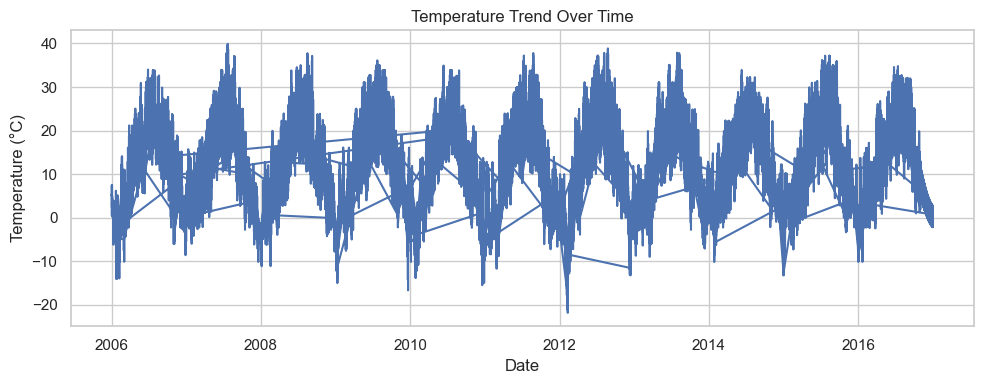

In [14]:
plt.figure(figsize=(10, 4))
plt.plot(df["Formatted Date"], df["Temperature (C)"])
plt.title("Temperature Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.tight_layout()
plt.savefig("../visualizations/weather/temperature_trend.png")
plt.show()


Humidity Distribution

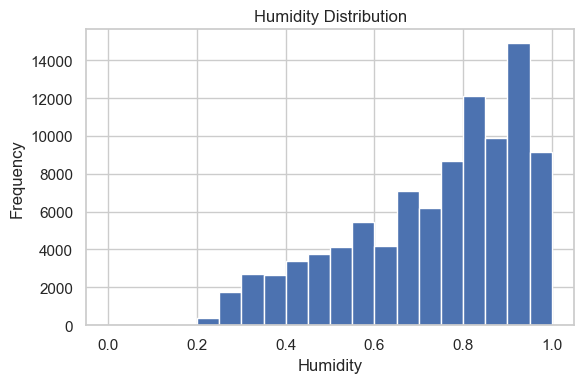

In [15]:
plt.figure(figsize=(6, 4))
plt.hist(df["Humidity"], bins=20)
plt.title("Humidity Distribution")
plt.xlabel("Humidity")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("../visualizations/weather/humidity_distribution.png")
plt.show()


Weather Condition Frequency

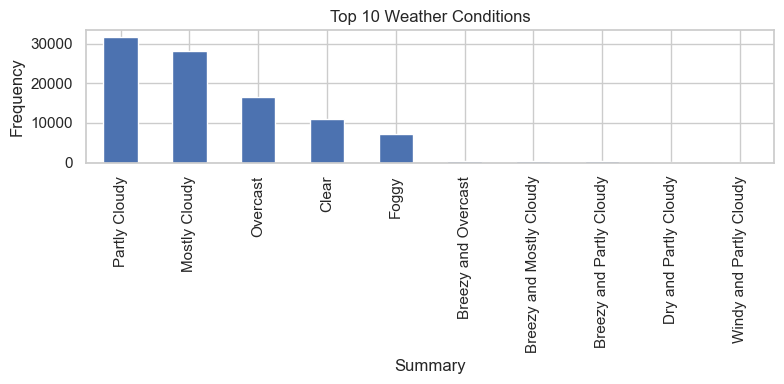

In [16]:
weather_counts = df["Summary"].value_counts().head(10)

plt.figure(figsize=(8, 4))
weather_counts.plot(kind="bar")
plt.title("Top 10 Weather Conditions")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("../visualizations/weather/weather_condition_frequency.png")
plt.show()


## ADVANCED WEATHER ANALYSIS

Seasonal Temperature Trends

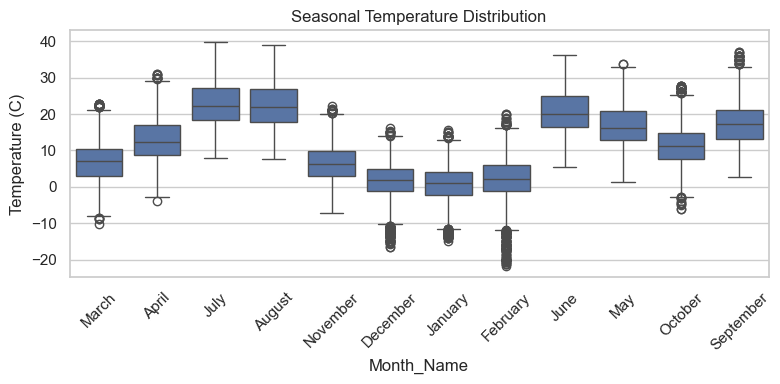

In [17]:
plt.figure(figsize=(8, 4))
sns.boxplot(x="Month_Name", y="Temperature (C)", data=df)
plt.xticks(rotation=45)
plt.title("Seasonal Temperature Distribution")
plt.tight_layout()
plt.savefig("../visualizations/weather/seasonal_temperature.png")
plt.show()


Wind Speed vs Temperature

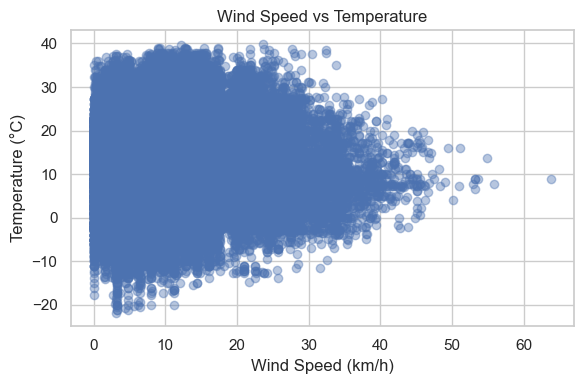

In [18]:
plt.figure(figsize=(6, 4))
plt.scatter(df["Wind Speed (km/h)"], df["Temperature (C)"], alpha=0.4)
plt.title("Wind Speed vs Temperature")
plt.xlabel("Wind Speed (km/h)")
plt.ylabel("Temperature (°C)")
plt.tight_layout()
plt.savefig("../visualizations/weather/wind_vs_temperature.png")
plt.show()


Correlation Heatmap

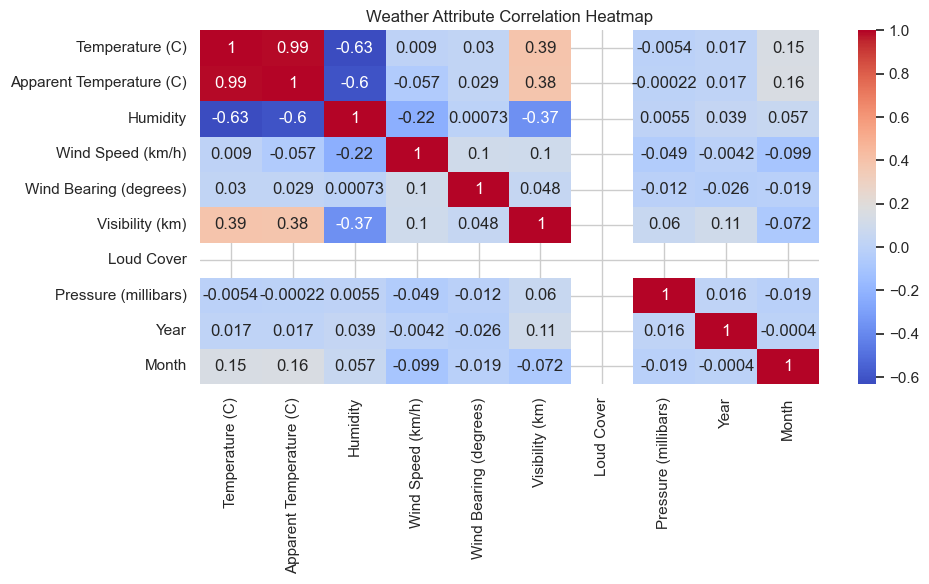

In [19]:
numeric_df = df.select_dtypes(include="number")

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=True)
plt.title("Weather Attribute Correlation Heatmap")
plt.tight_layout()
plt.savefig("../visualizations/weather/correlation_heatmap.png")
plt.show()


## STATISTICAL ANALYSIS

In [20]:
df[["Temperature (C)", "Humidity", "Wind Speed (km/h)"]].describe()


,Temperature (C),Humidity,Wind Speed (km/h)
count,96453.000000,96453.000000,96453.000000
mean,11.932678,0.734899,10.810640
std,9.551546,0.195473,6.913571
min,-21.822222,0.000000,0.000000
25%,4.688889,0.600000,5.828200
50%,12.000000,0.780000,9.965900
75%,18.838889,0.890000,14.135800
max,39.905556,1.000000,63.852600


## Key Findings

- Temperature exhibits clear seasonal variation.
- Humidity levels are skewed towards moderate values.
- Wind speed shows weak to moderate correlation with temperature.


## Climate Insights & Recommendations

### Insights
- Seasonal patterns significantly influence temperature behavior.
- Certain weather conditions dominate the dataset.

### Recommendations
1. Use seasonal trends for weather forecasting models.
2. Prepare infrastructure planning based on historical extremes.
3. Monitor wind and humidity interactions for climate studies.


## Conclusion & Future Scope

This analysis demonstrates how historical weather data can uncover meaningful
climate patterns and trends.

### Future Scope
- Extreme weather detection
- Predictive climate modeling
- Regional climate comparison studies
